# Libraries 

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn # note that codeacademy uses 'codecademylib3_seaborn' which is basically the same
import glob

## make sure to install the libraries via terminal (pip install if they do not work in jupyter ;)

## Prepare the data

In [3]:
# 2. Prepate the data

## use glob to iterate over the csv files
files = glob.glob("/Users/user/Projects_CodeAcademy/US_census_data-main/states*.csv") 
## Tip: Make sure to store the excel files in your local directory and just copy the pathname here
## The asterix * sign is a wildcard character that will extract all csv files with 'states' in their name

##  create an empty list and for each file ('files') open the csv and then append the data to empty list

us_census=[]
for filename in files:
  data = pd.read_csv(filename, index_col = 0)
  us_census.append(data)
  df = pd.concat(us_census)
print(df)




                  State  TotalPop             Hispanic                White  \
0          Rhode Island   1053661  13.356666666666678%   74.32541666666665%   
1        South Carolina   4777576   5.056684981684991%  62.888736263736185%   
2          South Dakota    843190  3.2396396396396376%   82.50090090090092%   
3             Tennessee   6499615   4.720026972353339%   73.49008766014822%   
4                 Texas  26538614   38.04673809068304%  44.687908934379145%   
5                  Utah   2903379  13.468376068376063%   79.40683760683764%   
0                  Utah   2903379  13.468376068376063%   79.40683760683764%   
1               Vermont    626604  1.6092896174863391%   93.98306010928961%   
2              Virginia   8256630     8.0110164981373%  63.271048430015945%   
3            Washington   6985464  11.140968858131506%   72.03840830449816%   
4         West Virginia   1851420   1.290909090909089%   92.17623966942146%   
5             Wisconsin   5742117   6.68333333333333

In [4]:
# 3 Let's see how the columns look like and  what data types the dataframe holds
print(df.columns)
print(df.dtypes)
 

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop'],
      dtype='object')
State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object


In [5]:
# 4 Look at the .head() of the DataFrame so that you can understand why some of these dtypes are objects instead of integers or floats.
print(df.head())

## -> Ethnic groups: we need to convert all ethinc groups into numeric values to be able to use them
# -> Income: strip $ and convert to numeric
# Gender: We can see that we need to split the column into two columns named "m" and "f" and convert the values to numeric
 

            State  TotalPop             Hispanic                White  \
0    Rhode Island   1053661  13.356666666666678%   74.32541666666665%   
1  South Carolina   4777576   5.056684981684991%  62.888736263736185%   
2    South Dakota    843190  3.2396396396396376%   82.50090090090092%   
3       Tennessee   6499615   4.720026972353339%   73.49008766014822%   
4           Texas  26538614   38.04673809068304%  44.687908934379145%   

                 Black                Native                Asian  \
0    5.68291666666667%   0.3462500000000001%  3.2474999999999983%   
1   28.75091575091577%   0.2923992673992673%   1.249175824175822%   
2  1.4238738738738752%    9.417567567567566%  1.0193693693693688%   
3  18.283816587997297%  0.22663519892110592%  1.4072825354012126%   
4   11.65004782858236%  0.26114405969007126%  3.6696958102161825%   

                 Pacific               Income            GenderPop  
0  0.035833333333333335%  $59125.270833333336      510388M_543273F  
1  0.046

## Convert some of the column values 

In [6]:

# 5 Use regex to turn the Income column into a format that is ready for conversion into a numerical type.
# Create the 'income' column
df.Income = df['Income'].replace('[\$,]', '', regex=True)

# Convert to numeric
df.Income = pd.to_numeric(df.Income)
df.Income = df.Income.round() # and round for easier read
print(df.Income.head())


0    59125.0
1    46297.0
2    51805.0
3    47328.0
4    55875.0
Name: Income, dtype: float64


In [7]:
# 6. GenderPop: Split the gender column using split

# First, let's look at the gender column
#print(df['GenderPop'].head())

# Second, let's split string in columns using the _ separator
split_df = df['GenderPop'].str.split('(_)', expand=True)

# print(split_df.head()) # We get three columns with relevant data in the first and third column

# Third, we can assign columns from this DataFrame to the original df: 
df['Male_pop'] = split_df[0]
df['Female_pop'] = split_df[2]

#print(df['Female_pop'].head())
#print(df['Male_pop'].head())

# Make sure to strip of the M and F indicators

df['Male_pop'] = df['Male_pop'].replace('[M,]', '', regex=True)
df['Female_pop'] = df['Female_pop'].replace('[F,]', '', regex=True)

print(df.Male_pop.head())
print(df.Female_pop.head())

0      510388
1     2322409
2      423477
3     3167756
4    13171316
Name: Male_pop, dtype: object
0      543273
1     2455167
2      419713
3     3331859
4    13367298
Name: Female_pop, dtype: object


In [8]:
# 7 Convert to numeric variables
df.Male_pop = pd.to_numeric(df.Male_pop)
df.Female_pop = pd.to_numeric(df.Female_pop)

# Make sure to drop the original GenderPop columm
df = df.drop(['GenderPop'], axis = 1)

print(df.head())


            State  TotalPop             Hispanic                White  \
0    Rhode Island   1053661  13.356666666666678%   74.32541666666665%   
1  South Carolina   4777576   5.056684981684991%  62.888736263736185%   
2    South Dakota    843190  3.2396396396396376%   82.50090090090092%   
3       Tennessee   6499615   4.720026972353339%   73.49008766014822%   
4           Texas  26538614   38.04673809068304%  44.687908934379145%   

                 Black                Native                Asian  \
0    5.68291666666667%   0.3462500000000001%  3.2474999999999983%   
1   28.75091575091577%   0.2923992673992673%   1.249175824175822%   
2  1.4238738738738752%    9.417567567567566%  1.0193693693693688%   
3  18.283816587997297%  0.22663519892110592%  1.4072825354012126%   
4   11.65004782858236%  0.26114405969007126%  3.6696958102161825%   

                 Pacific   Income  Male_pop  Female_pop  
0  0.035833333333333335%  59125.0    510388    543273.0  
1  0.046978021978021964%  4629

## Visualize 

Text(0, 0.5, 'Income')

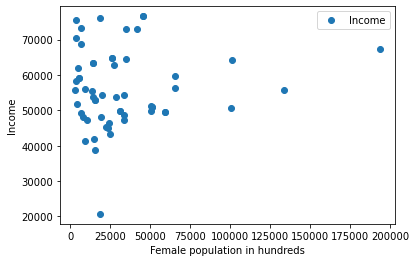

In [10]:
# 8 Make a scatter plot

# The instructions from codeacademy are not really clear here. Plotting Income vs Population does not make whole lot of sense

# Good to convert the axis for easier readability 
df['Female_pop'] = df['Female_pop'].div(100).round(1)
# print(df['Female_pop'].head())

ax = df.plot(x='Female_pop', y='Income', style='o')

# set the labels 
ax.set_xlabel("Female population in hundreds")
ax.set_ylabel("Income")




In [11]:

# 9 Deal with missing values
print(df.Female_pop.isna().sum())
print(df.Male_pop.isna().sum())
## only missings for female pop

df['Female_pop'] = df['Female_pop'].fillna((df.TotalPop - df.Male_pop)/(100))

#print(df['Female_pop'])
# print(df['Female_pop'].isna().sum()) # 0 missings now

3
0


In [12]:
# 10 Deal with the duplicates
df = df.drop_duplicates(subset=None, keep='first', inplace=False)

print(df.shape)
# now rows: 51 and 11 columns 


(51, 11)


Text(0, 0.5, 'Income')

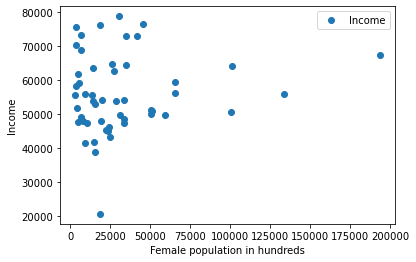

In [13]:
# 12 Make a scatter plot again

## Again not really meaningful to plot this type of data

ax = df.plot(x='Female_pop', y='Income', style='o')

# set the labels 
ax.set_xlabel("Female population in hundreds")
ax.set_ylabel("Income")


## Histograms

In [14]:
# 13. Make histograms using the columns for ethnicity 

# Make a column object to have a look at the relevant columns if you like 
#columnSeriesObj = df[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']]
#for column in columnSeriesObj:
   # Select column contents by column name using [] operator
   #print('Colunm Name : ', column)
   #print('Column Contents : ', df.values)



Colunm Name :  Hispanic
Column Contents :  [['Rhode Island' 1053661 '13.356666666666678%' '74.32541666666665%'
  '5.68291666666667%' '0.3462500000000001%' '3.2474999999999983%'
  '0.035833333333333335%' 59125.0 510388 5432.7]
 ['South Carolina' 4777576 '5.056684981684991%' '62.888736263736185%'
  '28.75091575091577%' '0.2923992673992673%' '1.249175824175822%'
  '0.046978021978021964%' 46297.0 2322409 24551.7]
 ['South Dakota' 843190 '3.2396396396396376%' '82.50090090090092%'
  '1.4238738738738752%' '9.417567567567566%' '1.0193693693693688%'
  '0.04189189189189189%' 51805.0 423477 4197.1]
 ['Tennessee' 6499615 '4.720026972353339%' '73.49008766014822%'
  '18.283816587997297%' '0.22663519892110592%' '1.4072825354012126%'
  '0.04315576534052599%' 47328.0 3167756 33318.6]
 ['Texas' 26538614 '38.04673809068304%' '44.687908934379145%'
  '11.65004782858236%' '0.26114405969007126%' '3.6696958102161825%'
  '0.06881576430074614%' 55875.0 13171316 133673.0]
 ['Utah' 2903379 '13.468376068376063%' '

In [15]:
# 14 Histograms and dealing with some more missing data

# Strip of the % signs in each column and round the numbers
for col in df[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']]:
    df[col] = df[col].replace('[\%,]', '', regex=True)
    df[col] = df[col].apply(pd.to_numeric, errors='coerce')
    df[col] = df[col].round(1)
    
# Any missings?
print(df.Pacific.isna().sum()) ## 4 missings


# Fill the missings
df['Pacific'] = df['Pacific'].fillna((df.TotalPop - df.Hispanic - df.White - df.Black - df.Native - df.Asian))
#print(df['Pacific'].head())

# print(df['Pacific'].isna().sum())


4


<ipython-input-15-3f5084f838ea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace('[\%,]', '', regex=True)
<ipython-input-15-3f5084f838ea>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(pd.to_numeric, errors='coerce')
<ipython-input-15-3f5084f838ea>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

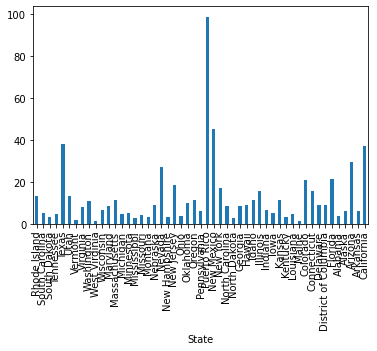

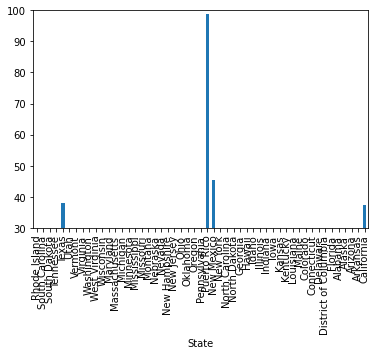

In [16]:
# Deal  with duplicates
df = df.drop_duplicates(subset=None, keep='first', inplace=False)

# Histogram
df.plot(x='State', y='Hispanic', kind='bar', legend=False)

# Let's look at the states only where we have over than 30% of hispanics

ax1 = df.plot(x='State', y='Hispanic', kind='bar', legend=False)
ax1.set_ylim(30,100)
plt.show()

## Some more visualisations using geopandas 

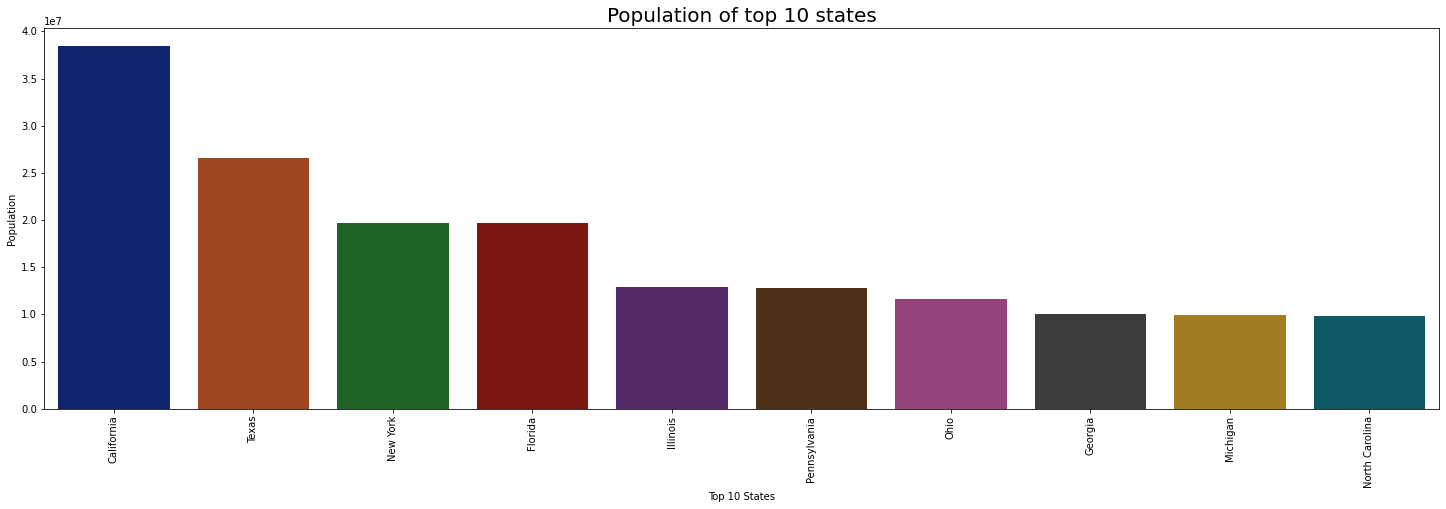

            State  TotalPop  Hispanic  White  Black  Native  Asian  Pacific  \
4      California  38421464      37.3   40.2    5.7     0.4   13.1      0.4   
4           Texas  26538614      38.0   44.7   11.7     0.3    3.7      0.1   
4         Florida  19645772      21.3   59.1   15.2     0.2    2.3      0.1   
2        New York  19673174      17.2   56.5   15.7     0.3    7.9      0.0   
3        Illinois  12873761      15.6   60.9   17.1     0.1    4.5      0.0   
3    Pennsylvania  12779559       6.1   77.4   11.6     0.1    2.8      0.0   
0            Ohio  11575977       3.7   75.9   16.2     0.2    1.6      0.0   
0         Georgia  10006693       8.4   54.3   32.1     0.2    3.1      0.0   
2        Michigan   9900571       4.6   72.4   17.6     0.5    2.4      0.0   
3  North Carolina   9845333       8.5   64.6   21.4     1.1    2.3      0.1   

    Income  Male_pop  Female_pop  
4  67265.0  19087135    193343.3  
4  55875.0  13171316    133673.0  
4  50690.0   9600009    1

In [17]:
# 15  Importing some more libraries for the extra analysis

import seaborn as sns

# What are the top 10 states by size, income and ethnic groups?

#print(df.head())

# Top ten states
top10_pop = df.nlargest(10,'TotalPop')
#print(top10_pop)

# Make a nice graph for it


plt.rcParams['figure.figsize'] = (25, 7)
ax = sns.barplot(x = top10_pop['State'], y = top10_pop['TotalPop'], palette = 'dark')
ax.set_xlabel(xlabel = 'Top 10 States', fontsize = 10)
ax.set_ylabel(ylabel = 'Population', fontsize = 10)
ax.set_title(label = 'Population of top 10 states', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

# Top ten states by income
top10_income = df.nlargest(10,'Income') # worthwile to move to Maryland apparently
#print(top10_income)
# you can make a similar visualisation

# ...by female population
top10_fem = df.nlargest(10,'Female_pop') # but women hang around in California 
#print(top10_fem)

# ...by male population
top10_male = df.nlargest(10,'Male_pop') # so do men
print(top10_male)

# ... by ethnic groups etc

# you can just plug in the columns you are interested in to make different visualisations





# Is there a correlation between population size and income?




<AxesSubplot:>

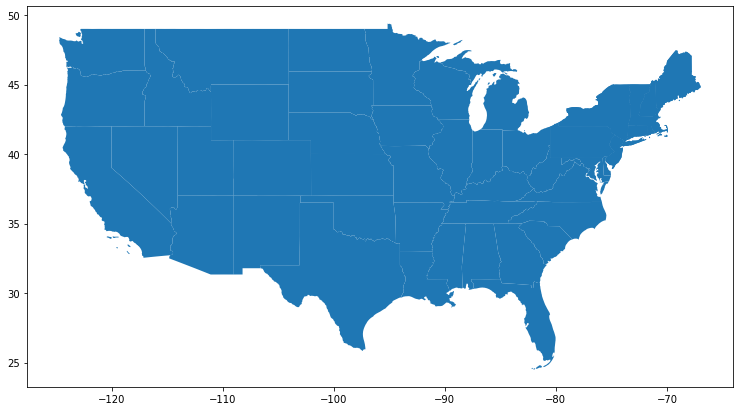

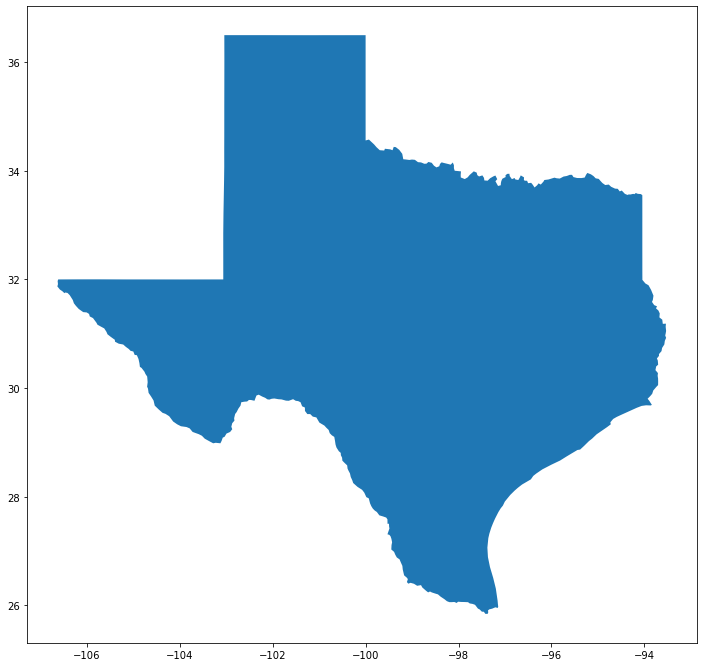

In [18]:
# Let's show this on a nice map
import geopandas

# Use the geopandas.read_file() function to read the shapefile from disk. Geopandas will return a GeoDataFrame object which is similar to a pandas DataFrame.

states = geopandas.read_file('/Users/user/Projects_CodeAcademy/geopandas-tutorial-master/data/usa-states-census-2014.shp')
type(states)
#geopandas.geodataframe.GeoDataFrame
states.head()
states.plot()

# We can plot a specific state

states[states['NAME'] == 'Texas']
states[states['NAME'] == 'Texas'].plot(figsize=(12, 12))



<ipython-input-32-eb37ba05119c>:21: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  usdata.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14),axis=1);


Text(-0.05, 0.5, 'https://jcutrer.com')

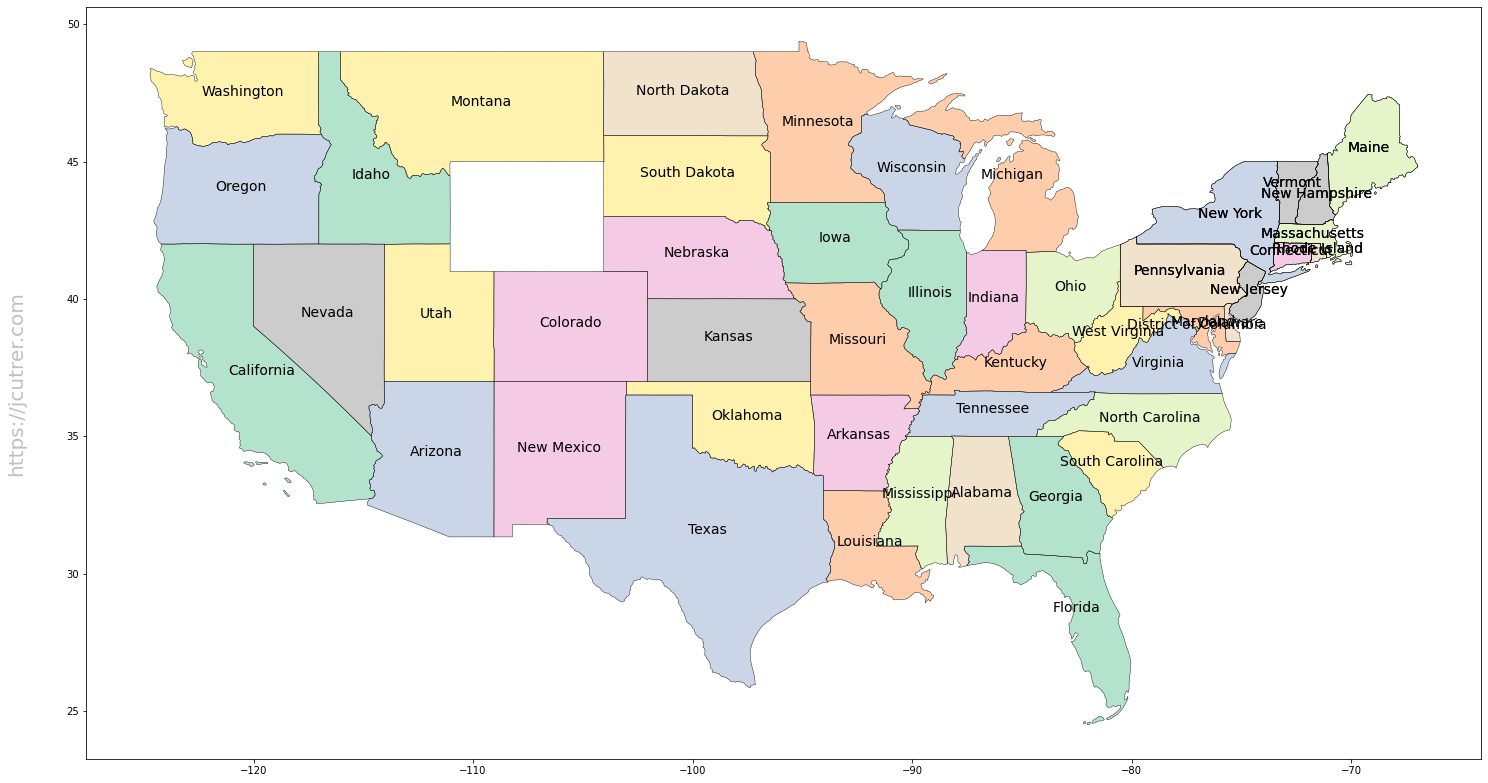

In [32]:
# Let's join our population data on the state map

#usdata = df.set_index('State').join(states.set_index('NAME')) # looks pretty good
#print(usdata.head())

df = df.rename(columns={'Name': 'NAME'})
#print(df.head())

usdata = states.merge(df, on = 'NAME')


# let's drop the states for which we do not have the necessary info to draw a map

#print(usdata.isna().sum())  # no missings - hurrayyyy



# Plot the map and state name
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
usdata.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14),axis=1);
usdata.boundary.plot(ax=ax, color='Black', linewidth=.4)
usdata.plot(ax=ax, cmap='Pastel2', figsize=(12, 12))
ax.text(-0.05, 0.5, 'https://jcutrer.com', transform=ax.transAxes,
        fontsize=20, color='gray', alpha=0.5,
        ha='center', va='center', rotation='90')


# 1. Make stacked bar chart that shows the ratio of females to males in each state


# 2. Show the three biggest ethnic groups per state


# 3. Let's see if higher income is correlated with a broader mix of ethnic groups?

<ipython-input-36-9105ad924c73>:9: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  usdata.apply(lambda x: ax.annotate(


<AxesSubplot:>

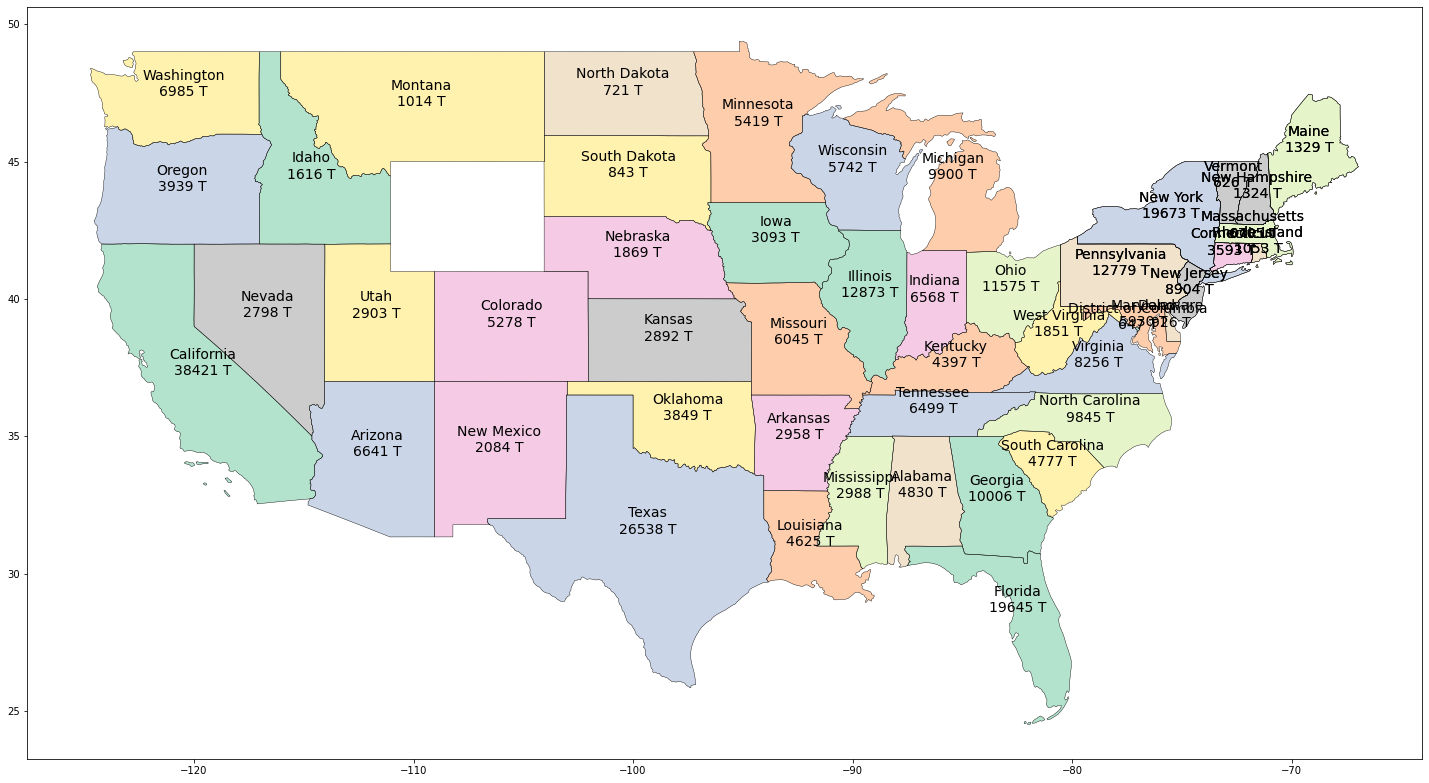

In [36]:

# Let's add the population size
## I found this great tutorial here: https://jcutrer.com/python/learn-geopandas-plotting-usmaps
## Multiline Labels
## Use a newline (\n) character 

import math
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
usdata.apply(lambda x: ax.annotate(
    s=x.NAME + "\n" + str(math.floor(x.TotalPop / 1000)) + " T", 
    xy=x.geometry.centroid.coords[0],
    ha='center', 
    fontsize=14
),axis=1);
usdata.boundary.plot(ax=ax, color='Black', linewidth=.4)
usdata.plot(ax=ax, cmap='Pastel2', figsize=(12, 12))




You can continue to use the geopandas package to show coloured maps for density, ethnicity, gender and income. Happy coding